In [1]:
import os
import glob
import errno
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
filepath = '../data/bbc/'

In [2]:
labels = []
# Accessing the labels names and saving then in "labels_names"
files = os.listdir(filepath)
for name in files:
    if os.path.isdir(filepath+name): 
        labels.append(name)

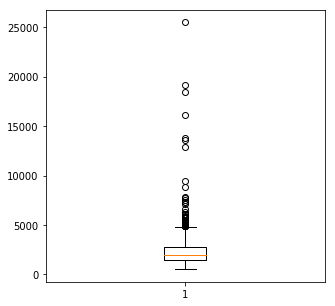

In [3]:
text = []   
texts_aux = [] 
texts_labels = []


# Label the content of each article
for label in labels:
    path = filepath+label+'/*.txt'
    files = glob.glob(path)
    for name in files:
        try:
            with open(name, 'r',encoding='ISO-8859-1') as f:
                texts_aux.append(f.read())
                texts_aux.append(label)
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise
        texts_labels.append(texts_aux)
        texts_aux=[]
 
# Labeled texts stored in a python list
#print(len(texts_labels))



# Labeled texts stored in numpy array
texts_labels_np = np.array(texts_labels)

# Labeled texts stored in panda dataframe
df = pd.DataFrame(texts_labels, columns=['text','label'])
#print(text_labels_df.head)


######
######
# Data preparation
######
######

df['pre_clean_len'] = [len(t) for t in df.text]

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()